# 1.Veri Setinin Tanitimi
 
ABD Nüfus Sayım Bürosu, Kaliforniya'daki her mahalle grubu için nüfus, ortalama gelir, ortalama konut fiyatı gibi 10 farklı metrik içeren Kaliforniya Nüfus Sayımı Verilerini yayınlamıştır. Bu veri seti aynı zamanda proje kapsamını belirlemek için girdi olarak kullanılmakta ve fonksiyonel ve fonksiyonel olmayan gereksinimleri belirlemeye çalışmaktadır.

**Problem Hedefi:** Proje, verilen veri setini kullanarak Kaliforniya'daki ortalama ev değerlerini tahmin etmek için bir konut fiyatları modeli oluşturmayı amaçlamaktadır. Bu model verilerden öğrenmeli ve diğer tüm metrikleri kullanarak herhangi bir bölgedeki ortalama konut fiyatını tahmin edebilmelidir. Ortalama gelire dayalı olarak konut fiyatlarını tahmin etmek ve bunun için regresyon grafiğini çizmek.

Proje veri setinde 20.640 bölge bulunmaktadır.

__[Kaggle Link](https://www.kaggle.com/datasets/shibumohapatra/house-price/data)__

In [1]:
import pandas as pd 

In [4]:
# Yeni veri setini yükleme
data = pd.read_csv('1553768847-housing.csv')

In [6]:
# Veri setinin ilk birkaç satırını ve genel bilgi özetini görüntüleme
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


### Veri Seti Genel Özellikleri:

**Toplam Gözlem Sayısı:** 20,640

**Sütun Sayısı:** 10

**Değişkenler:**

**longitude ve latitude:** Coğrafi koordinatlar.

**housing_median_age:** Konutların yaş medyanı.

**total_rooms ve total_bedrooms:** Toplam oda ve yatak odası sayısı.

**population:** Mahalledeki nüfus.

**households:** Hane sayısı.

**median_income:** Mahalledeki gelir medyanı.

**ocean_proximity:** Denize yakınlık (kategorik).

**median_house_value:** Konut fiyat medyanı (bağımlı değişken).


In [8]:
data.describe() 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
# Verideki eksik verileri bulma
data.isnull().sum() 

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [ ]:
# Total_bedrooms sütunundaki eksik verileri doldurma
# Eksik verileri doldurmak icin ortalamayı kullanabiliriz
data['total_bedrooms'].fillna(data['total_bedrooms'].mean(), inplace=True)
data.isnull().sum() 

C:\Users\furka\AppData\Local\Temp\ipykernel_43968\2805508575.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['total_bedrooms'].fillna(data['total_bedrooms'].mean(), inplace=True)


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

In [11]:
# Veri setindeki sutun tiplerini gorme
data.dtypes

longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms        float64
population              int64
households              int64
median_income         float64
ocean_proximity        object
median_house_value      int64
dtype: object

In [13]:
#veri sertindeki kategorik değişkenleri numerik değişkenlere dönüştürme 
numeric_data = data.select_dtypes(include=["float64", "int64"])
#numerik degiskenlerin istatistiksel ozetleri 
numeric_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.266592,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,438.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


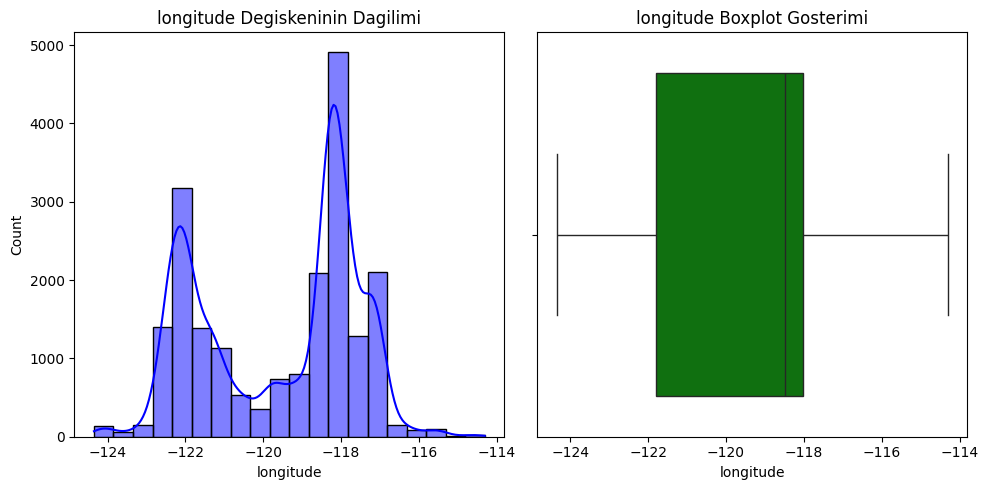

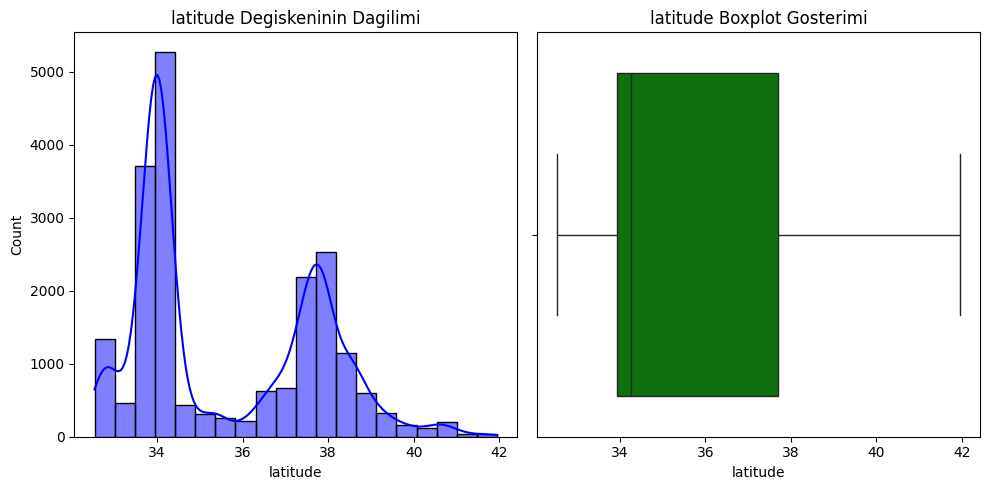

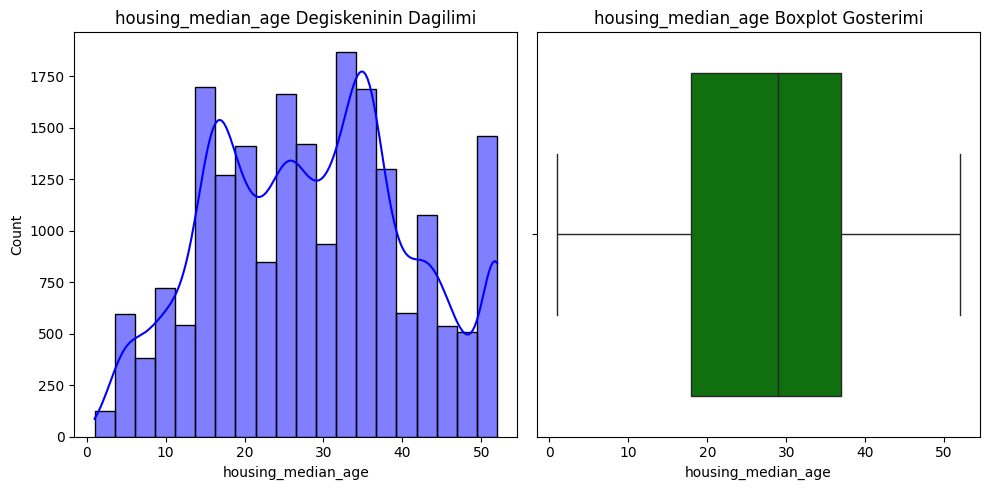

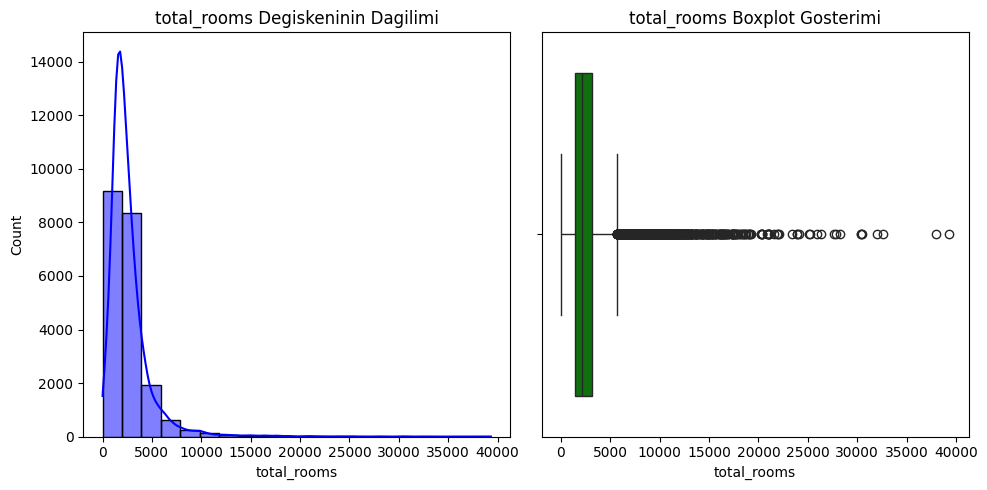

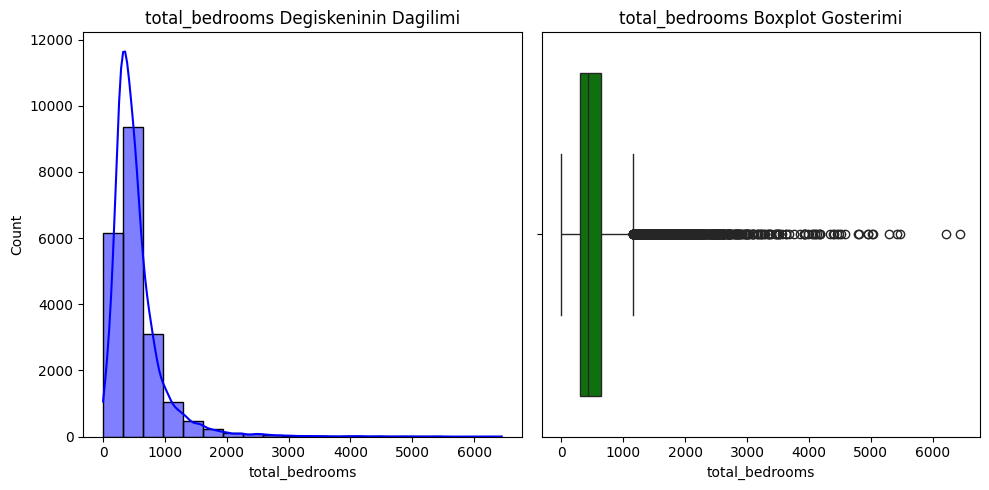

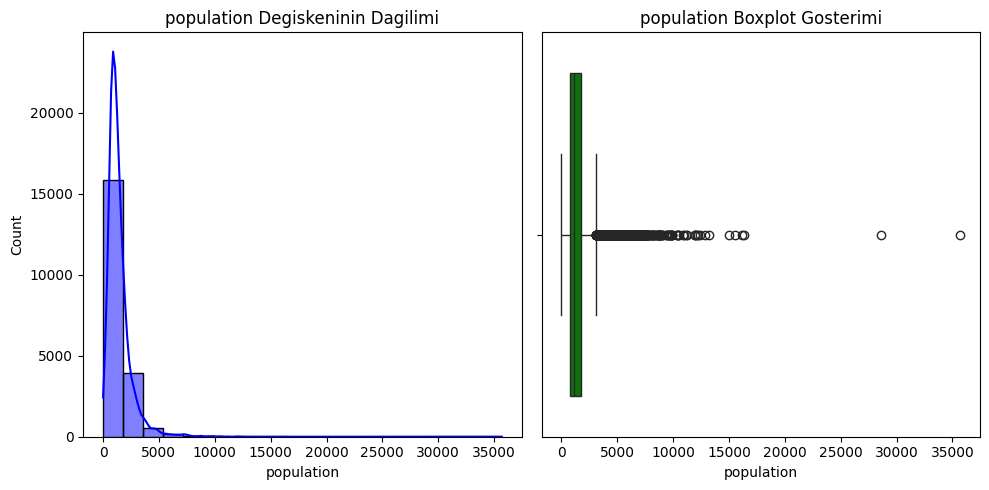

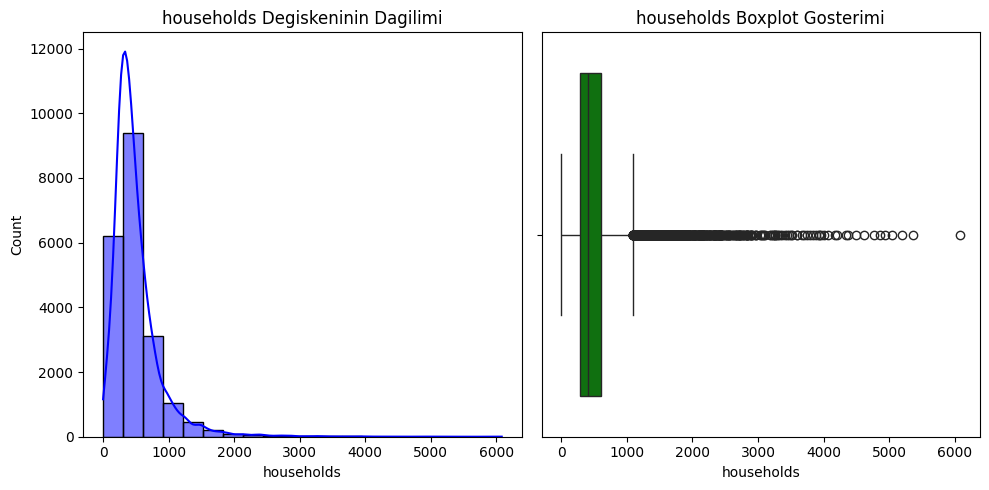

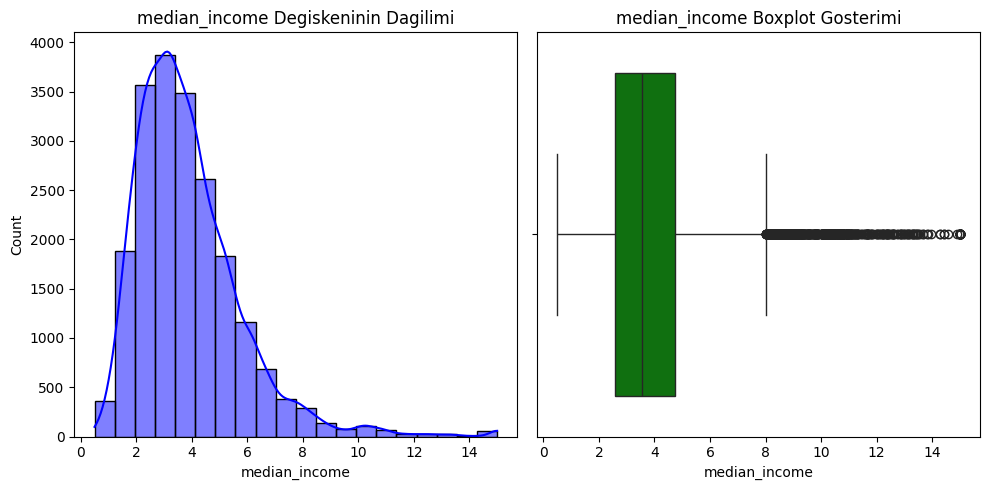

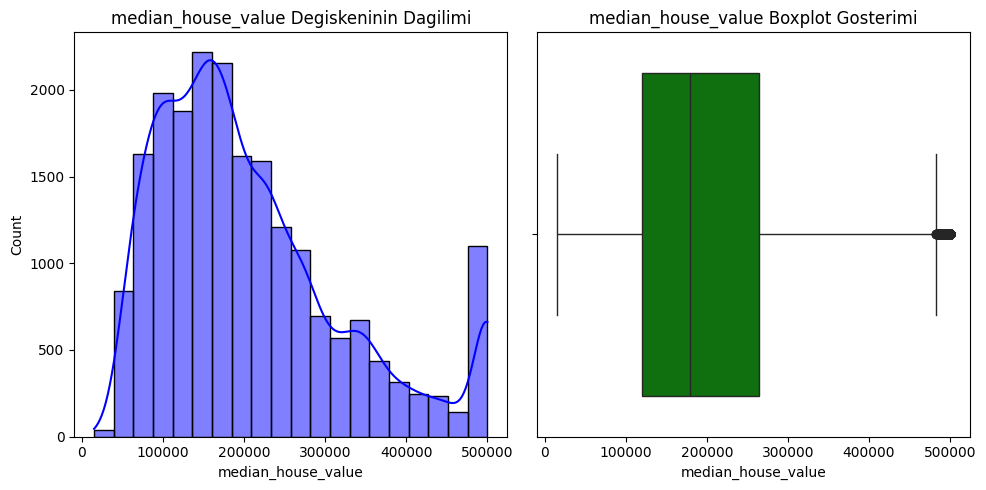

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
# histogram ve boxplot ile veri gorsellestirme
for column in numeric_data.columns:
    plt.figure(figsize=(10, 5))
    
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(numeric_data[column], kde=True, bins=20, color='blue')
    plt.title(f'{column} Degiskeninin Dagilimi')
    
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=numeric_data[column], color='green')
    plt.title(f'{column} Boxplot Gosterimi')
    
    plt.tight_layout()
    plt.show()

# 3. KORELASYON MATRISI


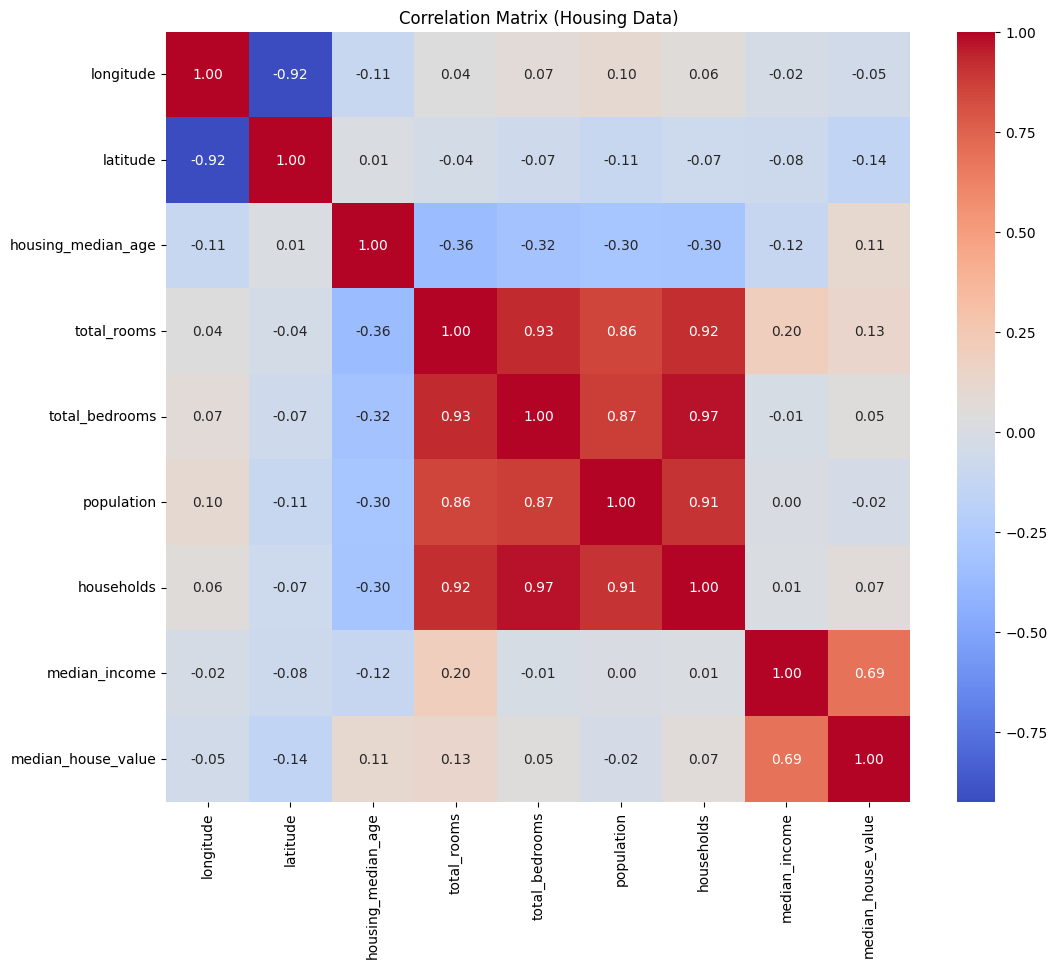

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069260,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066658,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.318998,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.927253,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069260,-0.066658,-0.318998,0.927253,1.000000,0.873910,0.974725,-0.007682,0.049454
population,0.099773,-0.108785,-0.296244,0.857126,0.873910,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.974725,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007682,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049454,-0.024650,0.065843,0.688075,1.000000


In [21]:
# Korelasyon matrisi
correlation_matrix = numeric_data.corr()

# Korelasyon ısı haritası
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix (Housing Data)")
plt.show()

correlation_matrix

# 4. Coklu Dogrusal Regresyon

In [72]:
# Bagımsız ve bagımlı degiskenlerin ayrılması
x_housing = numeric_data.drop(columns=["median_house_value"])
y_housing = numeric_data["median_house_value"]

import statsmodels.api as sm
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x_housing,y_housing,test_size=0.3,random_state=100)

# Bagımsız degiskenlere sabit eklenmesi

x_trainx = sm.add_constant(xtrain)
x_testx = sm.add_constant(xtest)
# Modelin olusturulması
model = sm.OLS(ytrain, x_trainx).fit()

# Modelin ozetini goruntuleme 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     3050.
Date:                Mon, 18 Nov 2024   Prob (F-statistic):               0.00
Time:                        16:14:14   Log-Likelihood:            -1.8177e+05
No. Observations:               14448   AIC:                         3.636e+05
Df Residuals:                   14439   BIC:                         3.636e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -3.578e+06    7.6e+04    -47.089      0.000   -3.73e+06   -3.43e+06
longitude          -4.263e+04    866.373    -49.208      0.000   -4.43e+04   -4.09e+04
latitude           -4.234e+04    817.070    -51.824      0.000   -4.39e+04   -4.07e+04
housing_median_age  1174.2547     52.034     22.567      0.000    1072.262    1276.247
total_rooms           -6.3010      0.924     -6.816      0.000      -8.113      -4.489
total_bedrooms        78.7764      7.175     10.980      0.000      64.713      92.840
population           -38.5326      1.260    -30.580      0.000     -41.002     -36.063
households            77.5396      8.033      9.652      0.000      61.793      93.286
median_income       3.947e+04    399.155     98.890      0.000    3.87e+04    4.03e+04
==============================================================================
Omnibus:                     3674.140   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15294.421
Skew:                           1.200   Prob(JB):                         0.00
Kurtosis:                       7.432   Cond. No.                     5.16e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.16e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### VIF degerini hesaplama

In [73]:
# vif degerlerini hesaplama
from statsmodels.stats.outliers_influence import variance_inflation_factor


vif_housing = pd.DataFrame()
vif_housing["Variable"] = x_trainx.columns
vif_housing["VIF"] = [variance_inflation_factor(x_trainx.values, i) for i in range(x_trainx.shape[1])]
vif_housing.sort_values(by="VIF", ascending=False)


,Variable,VIF
0,const,16801.952868
7,households,27.937110
5,total_bedrooms,26.811219
4,total_rooms,12.131357
2,latitude,8.925024
1,longitude,8.826635
6,population,6.157424
8,median_income,1.680506
3,housing_median_age,1.260041


## 5. DEGISKENLER

In [ ]:
# vif degerleri yuksek olan degiskenlerin cikarilmasi
xtrainx1 = x_trainx.drop('households', axis=1)
xtestx1 = x_testx.drop('households', axis=1)
col2 = xtrainx1.columns.to_list()
vif = [variance_inflation_factor(xtrainx1.values, i) for i in range(xtrainx1.shape[1])]
vif_df = pd.DataFrame(vif, index=col2, columns=['VIF'])
vif_df.sort_values(by='VIF', ascending=False)

,VIF
const,16094.240568
total_rooms,12.103859
total_bedrooms,10.987119
latitude,8.645963
longitude,8.471407
population,4.762256
median_income,1.680450
housing_median_age,1.259655


In [ ]:
# vif degerleri yuksek olan degiskenlerin cikarilmasi
xtrainx2 = xtrainx1.drop('total_rooms',axis=1)
xtestx2 = xtestx1.drop('total_rooms',axis=1)
col3 = xtrainx2.columns.to_list()
vif = [variance_inflation_factor(xtrainx2.values, i) for i in range(xtrainx2.shape[1])]
vif_df = pd.DataFrame(vif, index=col3, columns=['VIF'])
vif_df.sort_values(by='VIF', ascending=False)


,VIF
const,15701.852068
latitude,8.172253
longitude,8.170553
total_bedrooms,4.286649
population,4.244145
housing_median_age,1.253189
median_income,1.113886


In [ ]:
# ikinci modeli kurma
model2 = sm.OLS(ytrain, xtrainx2).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.625
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     4008.
Date:                Mon, 18 Nov 2024   Prob (F-statistic):               0.00
Time:                        16:14:56   Log-Likelihood:            -1.8184e+05
No. Observations:               14448   AIC:                         3.637e+05
Df Residuals:                   14441   BIC:                         3.637e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -3.802e+06   7.38e+04    -51.532      0.000   -3.95e+06   -3.66e+06
longitude          -4.533e+04    837.344    -54.133      0.000    -4.7e+04   -4.37e+04
latitude           -4.494e+04    785.410    -57.213      0.000   -4.65e+04   -4.34e+04
housing_median_age  1206.7635     52.128     23.150      0.000    1104.586    1308.941
total_bedrooms       109.1542      2.882     37.875      0.000     103.505     114.803
population           -35.0692      1.051    -33.371      0.000     -37.129     -33.009
median_income       3.802e+04    326.447    116.465      0.000    3.74e+04    3.87e+04
==============================================================================
Omnibus:                     3540.602   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13343.327
Skew:                           1.187   Prob(JB):                         0.00
Kurtosis:                       7.066   Cond. No.                     2.45e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.45e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# bir de linear regression modeli kurup sonuçları görmek istedim 

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

def met(title, y_true, y_pred):
	mse = mean_squared_error(y_true, y_pred)
	r2 = r2_score(y_true, y_pred)
	print(f"{title}\nMean Squared Error: {mse}\nR^2 Score: {r2}\n")

lr = LinearRegression()
model3 = lr.fit(xtrainx2, ytrain)
ypred_tr = lr.predict(xtrainx2)
ypred_te = lr.predict(xtestx2)
met('Linear Regression model and result for Train', ytrain, ypred_tr)

Linear Regression model and result for Train
Mean Squared Error: 5006294638.432473
R^2 Score: 0.624826470801972



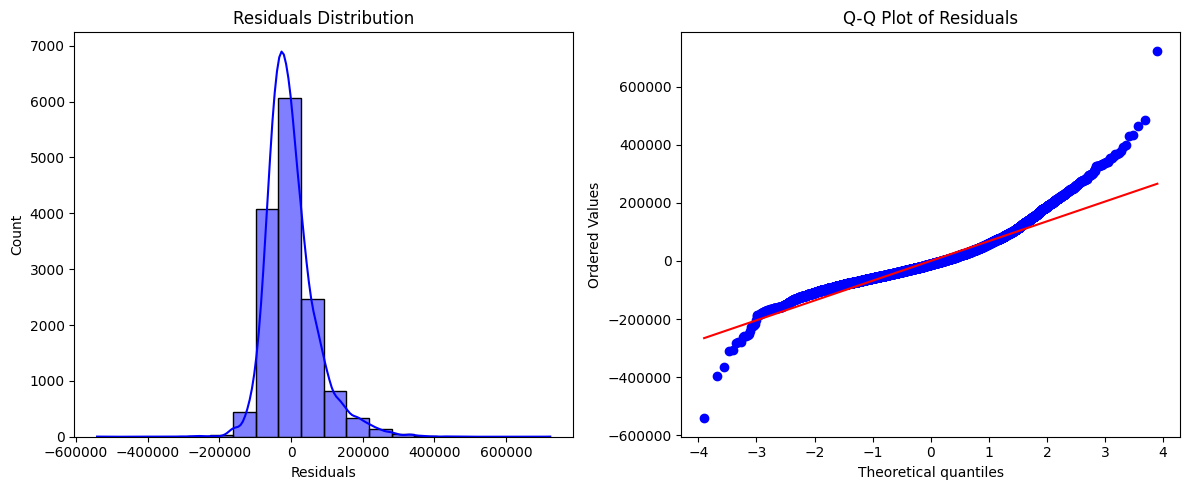

x:\denetimli vize conda\.conda\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 14448.
  res = hypotest_fun_out(*samples, **kwds)


ShapiroResult(statistic=np.float64(0.9260454425911586), pvalue=np.float64(9.052335288968133e-64))

In [ ]:
# vif degerleri daha duzgun oldugu icin model 2 ile devam etmeye karar verdim
# Hataların hesaplanması

residuals_housing = model2.resid

# Hataların normal dağılımını kontrol etmek için histogram ve Q-Q plot
plt.figure(figsize=(12, 5))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(residuals_housing, kde=True, bins=20, color='blue')
plt.title("Residuals Distribution")
plt.xlabel("Residuals")

# Q-Q plot
plt.subplot(1, 2, 2)
stats.probplot(residuals_housing, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")

plt.tight_layout()
plt.show()

# Shapiro-Wilk testi ve levene testi uygulamasi
shapiro_test = stats.shapiro(residuals_housing)  # Normality test
levene_test = stats.levene(residuals_housing, y_pred)  # Homoscedasticity test

shapiro_test, levene_test


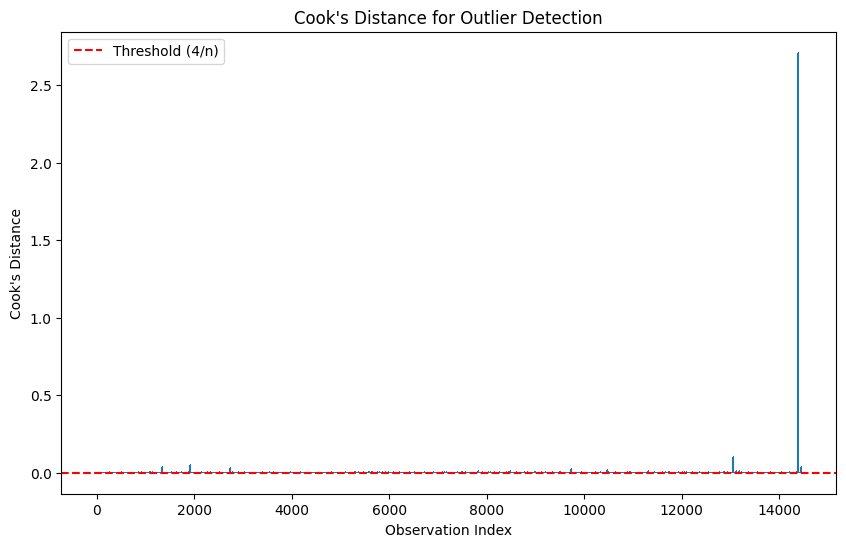

(838, [61, 74, 84, 94, 99, 107, 195, 200, 233, 244])

In [ ]:
# cook distatnce hesaplama
from statsmodels.stats.outliers_influence import OLSInfluence

influence = OLSInfluence(model2)
cooks_distance = influence.cooks_distance

# cook distance degerlerini gorsellestirme
plt.figure(figsize=(10, 6))
plt.stem(range(len(cooks_distance[0])), cooks_distance[0], markerfmt=",", basefmt=" ")
plt.axhline(4 / len(cooks_distance[0]), color="red", linestyle="--", label="Threshold (4/n)")
plt.title("Cook's Distance for Outlier Detection")
plt.xlabel("Observation Index")
plt.ylabel("Cook's Distance")
plt.legend()
plt.show()

# influential points hesaplama
influential_points = cooks_distance[0] > (4 / len(cooks_distance[0]))
influential_indices = [i for i, is_influential in enumerate(influential_points) if is_influential]

len(influential_indices), influential_indices[:10]  # Number and 

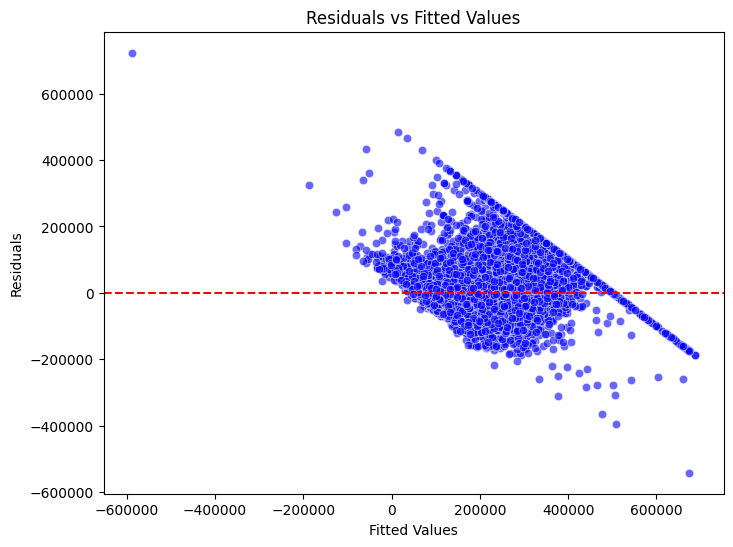

x:\denetimli vize conda\.conda\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 14448.
  res = hypotest_fun_out(*samples, **kwds)


(ShapiroResult(statistic=np.float64(0.9260454425911586), pvalue=np.float64(9.052335288968133e-64)),
 LeveneResult(statistic=np.float64(2545.054839371016), pvalue=np.float64(0.0)))

In [103]:
from statsmodels.stats.diagnostic import het_breuschpagan

# Hataların sabit varyans varsayımını kontrol etmek için hata-öngörülen değer grafiği
plt.figure(figsize=(8, 6))
sns.scatterplot(x=model2.fittedvalues, y=residuals_housing, color='blue', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Residuals vs Fitted Values")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()

shapiro_test = stats.shapiro(residuals_housing)  # Normality test
levene_test  = stats.levene(residuals_housing, y_housing)

shapiro_test, levene_test



# 6. MODELI GELISTIRMEK ICIN GORUS VE ONERILER

In [ ]:
# random forest kullanarak model kurma ( EN KOLAYI BU OLUR )

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=100)
model3 = rf.fit(xtrainx2, ytrain)
ypred_rf_tr = rf.predict(xtrainx2)
ypred_rf_te = rf.predict(xtestx2)
met('Random Forest model and result for test', ytest, ypred_rf_te)


Random Forest model and result for test
Mean Squared Error: 2399832253.219143
R^2 Score: 0.8188061631868614

